In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split ,StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer



In [ ]:
!pip install joblib


In [ ]:
df = pd.read_csv("restaurant_churn_dataset.csv")
df

,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,...,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction,Churn,TotalRating,SpendPerVisit
0,654,35,Male,83380,Weekly,27.829142,Chinese,Breakfast,3,Business,...,1,1,43.523929,2,5,4,0,1,11,9.276381
1,655,19,Male,43623,Rarely,115.408622,American,Dinner,1,Casual,...,0,0,57.524294,5,5,3,0,1,13,115.408622
2,656,41,Female,83737,Weekly,106.693771,American,Dinner,6,Celebration,...,1,0,48.682623,3,4,5,0,1,12,17.782295
3,657,43,Male,96768,Rarely,43.508508,Indian,Lunch,1,Celebration,...,0,0,7.552993,4,5,1,0,1,10,43.508508
4,658,55,Female,67937,Monthly,148.084627,Chinese,Breakfast,1,Business,...,0,1,37.789041,2,3,5,0,1,10,148.084627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2149,39,Male,114857,Monthly,163.015254,American,Lunch,2,Business,...,1,1,7.206275,1,2,1,0,0,4,81.507627
1496,2150,37,Female,133506,Weekly,190.991911,Italian,Lunch,4,Casual,...,0,0,37.863952,5,2,2,0,1,9,47.747978
1497,2151,46,Male,119159,Monthly,150.088604,American,Lunch,4,Casual,...,1,0,3.925785,3,3,3,1,0,9,37.522151
1498,2152,24,Male,27970,Weekly,196.363626,Italian,Dinner,6,Casual,...,1,0,24.228038,2,2,4,1,0,8,32.727271


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Income,0
VisitFrequency,0
AverageSpend,0
PreferredCuisine,0
TimeOfVisit,0
GroupSize,0
DiningOccasion,0


<Axes: xlabel='Gender', ylabel='Count'>

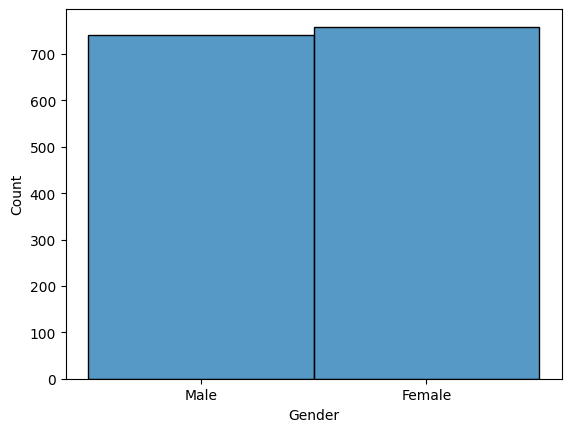

In [ ]:
sns.histplot(data = df["Gender"])

In [ ]:
# Grouped the similar type of columns (Numerical and non numerical)
target_col = "Churn"
# leak_cols
leak_cols = ["CustomerID", "HighSatisfaction", "TotalRating", "SpendPerVisit"]

X = df.drop(columns=[target_col] + leak_cols)
y = df[target_col]

cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Count of churn and not churns
df["Churn"] = df['Churn'].astype('float')
df["Churn"].dtype
df["Churn"].value_counts()

,count
Churn,
1.0,888
0.0,612


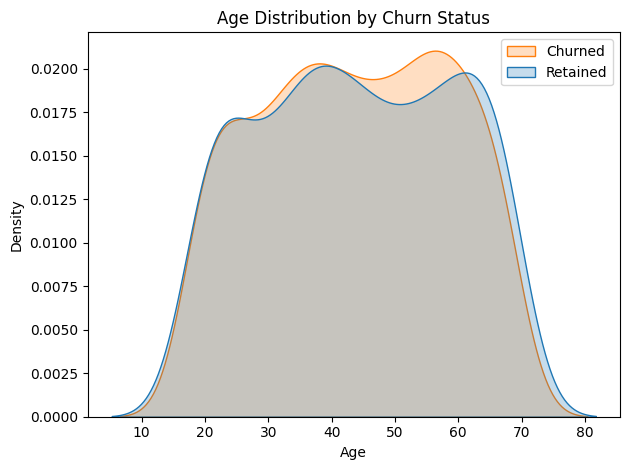

In [ ]:
# Age vs Density
plt.Figure(figsize=(12,6))
sns.kdeplot(data=df, x='Age', hue='Churn', fill=True, common_norm=False)
plt.title('Age Distribution by Churn Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(labels=['Churned', 'Retained'])
plt.tight_layout()
plt.show()

(1500, 22)
CustomerID                int64
Age                       int64
Gender                   object
Income                    int64
VisitFrequency           object
AverageSpend            float64
PreferredCuisine         object
TimeOfVisit              object
GroupSize                 int64
DiningOccasion           object
MealType                 object
OnlineReservation         int64
DeliveryOrder             int64
LoyaltyProgramMember      int64
WaitTime                float64
ServiceRating             int64
FoodRating                int64
AmbianceRating            int64
HighSatisfaction          int64
Churn                   float64
TotalRating               int64
SpendPerVisit           float64
dtype: object
CustomerID              0
Age                     0
Gender                  0
Income                  0
VisitFrequency          0
AverageSpend            0
PreferredCuisine        0
TimeOfVisit             0
GroupSize               0
DiningOccasion          0
MealType   

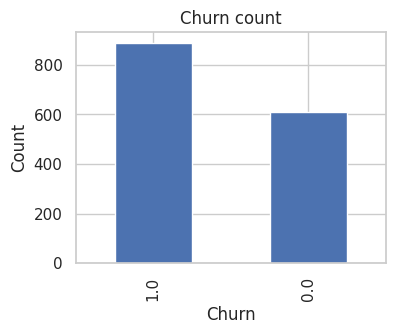

In [ ]:
# Everything about the dataset

sns.set(style="whitegrid")

print(df.shape)
print(df.dtypes)
print(df.isna().sum())

print(df["Churn"].value_counts(normalize=True))

plt.figure(figsize=(4,3))
df["Churn"].value_counts().plot(kind="bar")
plt.title("Churn count")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


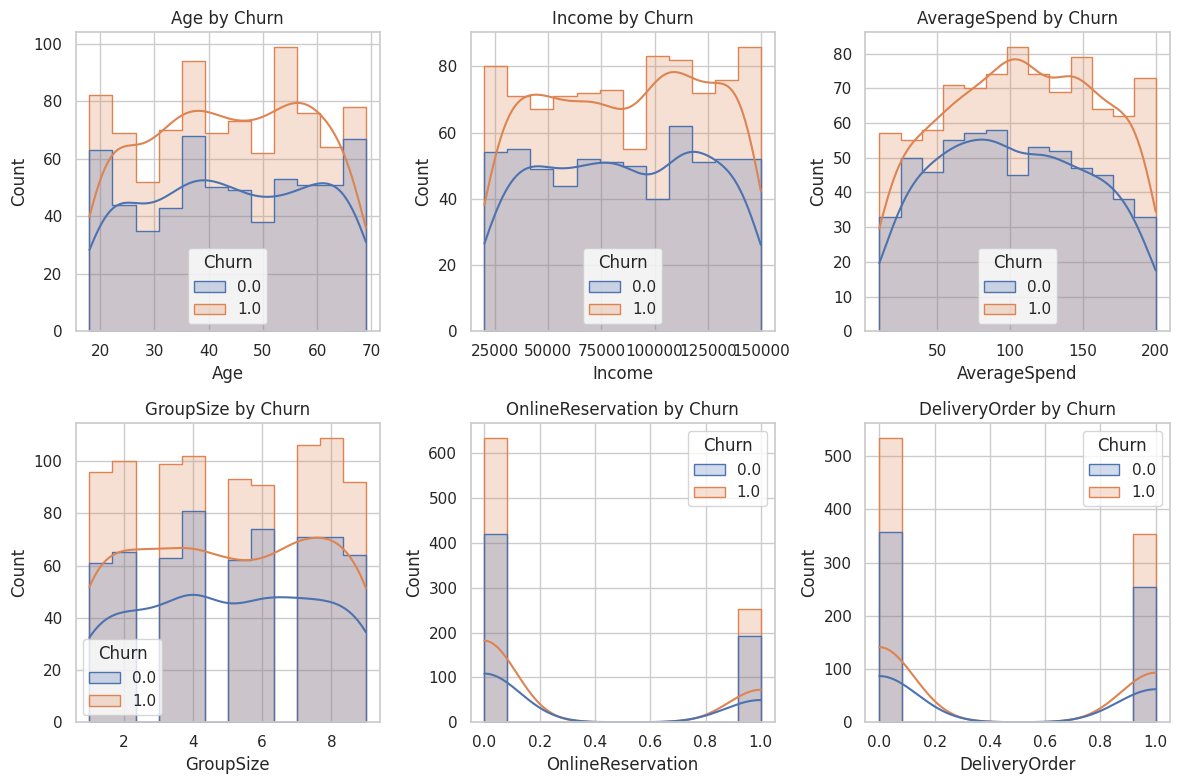

In [ ]:
# Analysis of numerical data columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
num_cols = [c for c in num_cols if c not in ["CustomerID"]]

df[num_cols].describe()

plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols[:6], 1):
    plt.subplot(2,3,i)
    sns.histplot(data=df, x=col, hue="Churn", kde=True, element="step")
    plt.title(f"{col} by Churn")
plt.tight_layout()
plt.show()


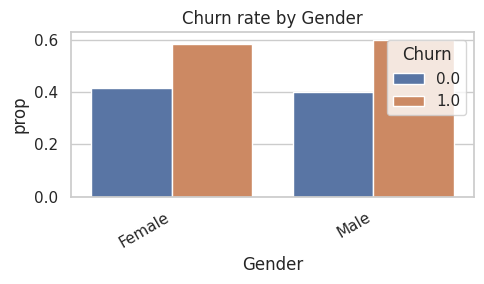

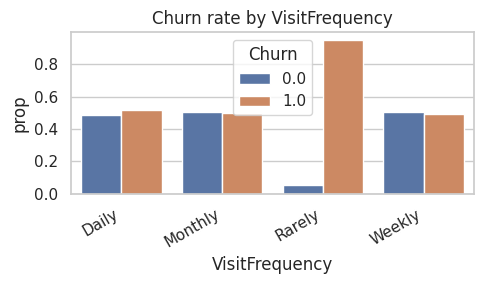

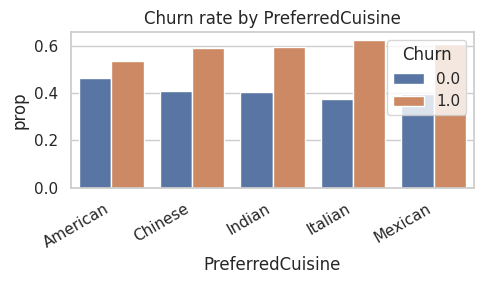

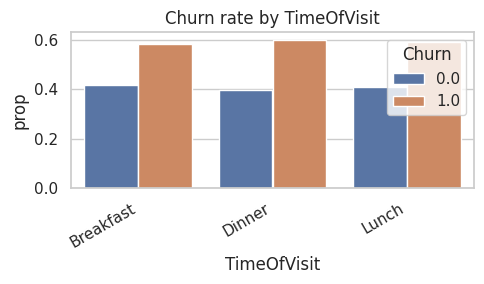

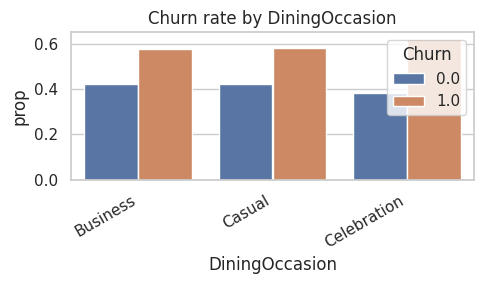

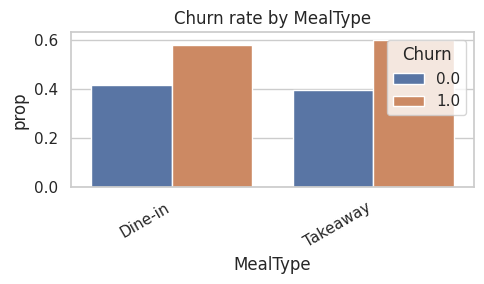

In [ ]:
# Anilysis of non numerical data columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

for col in cat_cols:
    plt.figure(figsize=(5,3))
    prop = (df.groupby(col)["Churn"]
              .value_counts(normalize=True)
              .rename("prop")
              .reset_index())
    sns.barplot(data=prop, x=col, y="prop", hue="Churn")
    plt.title(f"Churn rate by {col}")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()


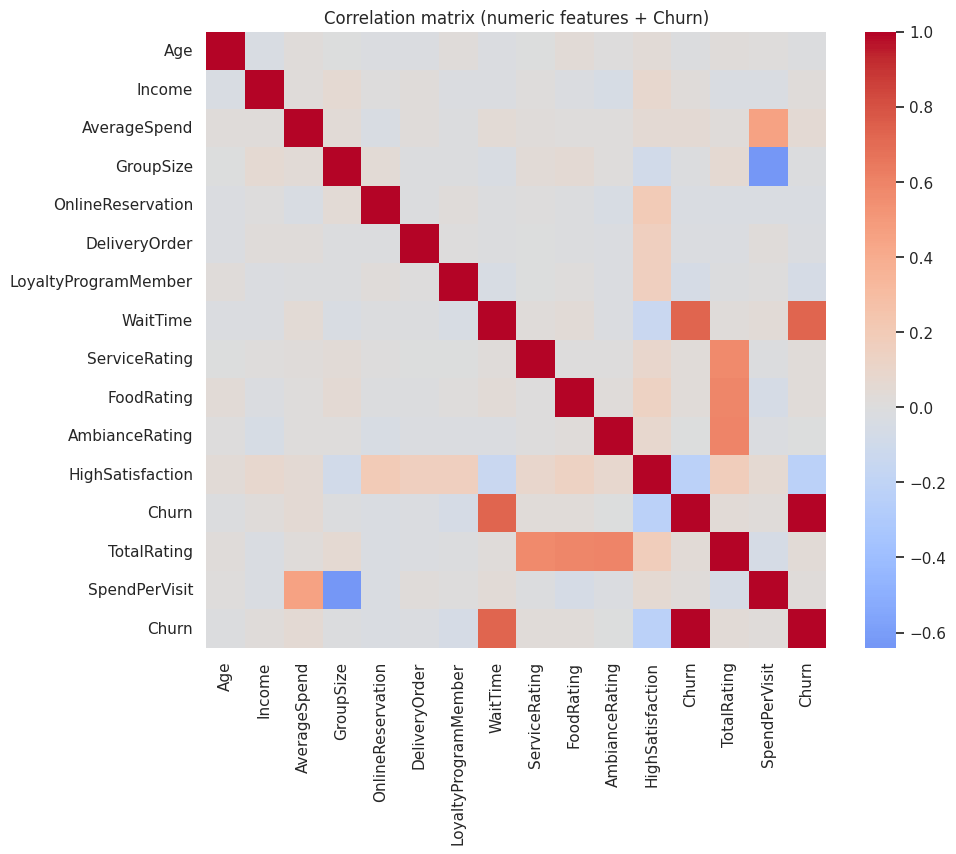

In [ ]:
# Dependence of churn on each column of the dataset
plt.figure(figsize=(10,8))
corr = df[num_cols + ["Churn"]].corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation matrix (numeric features + Churn)")
plt.show()


In [ ]:
#model building

cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols),
    ]
)

rf_clf = RandomForestClassifier(
    n_estimators=10,
    max_depth=2,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features="sqrt",
    class_weight="balanced",
    random_state=42,
    n_jobs=-1,
)

model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("rf", rf_clf),
])

model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("Train accuracy:", accuracy_score(y_train, train_pred))
print("Test accuracy :", accuracy_score(y_test, test_pred))
print("\nConfusion matrix:")
print(confusion_matrix(y_test, test_pred))
print("\nClassification report:")
print(classification_report(y_test, test_pred))


Train accuracy: 0.9125
Test accuracy : 0.9133333333333333

Confusion matrix:
[[122   0]
 [ 26 152]]

Classification report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       122
           1       1.00      0.85      0.92       178

    accuracy                           0.91       300
   macro avg       0.91      0.93      0.91       300
weighted avg       0.93      0.91      0.91       300



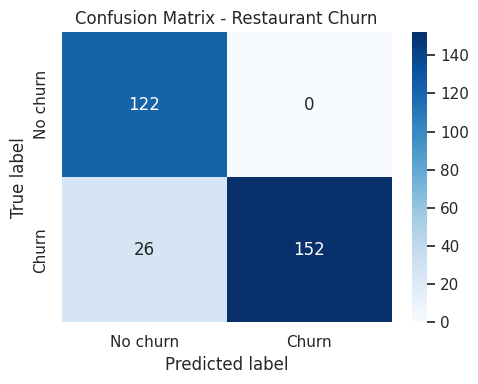

In [ ]:
# Confusion Matrix

cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No churn", "Churn"],
    yticklabels=["No churn", "Churn"]
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Restaurant Churn")
plt.tight_layout()
plt.show()


In [ ]:
import joblib
joblib.dump(model, 'churn_model.pkl')
print("Model saved as churn_model.pkl")


Model saved as churn_model.pkl


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
